<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/sd3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Stability-AI/sd3.5.git

In [ ]:
%cd sd3.5
!pip install -r requirements.txt

In [ ]:
!huggingface-cli login

In [ ]:
!huggingface-cli download stabilityai/stable-diffusion-3-medium  --local-dir ./models/stabilityai/stable-diffusion-3-medium --local-dir-use-symlinks False

In [2]:
!pip install -qU diffusers bitsandbytes xformers torchaudio torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 94.9 MB/s eta 0:00:00


In [1]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large", torch_dtype=torch.bfloat16)
#pipe = pipe.to("cuda") # A100
pipe.enable_model_cpu_offload()
print(pipe,pipe.device)

#pipe.enable_xformers_memory_efficient_attention()


image = pipe(
    "A capybara holding a sign that reads Hello World",
    num_inference_steps=28,
    guidance_scale=3.5,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    generator=torch.Generator(device=pipe.device).manual_seed(2),
).images[0]
print(type(image))
image.save("capybara.png")
image

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-3.5-large",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}
 cpu


  0%|          | 0/28 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "bfloat16",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant": false,
  "llm_int8_enable_fp32_cpu_offload": false,
  "llm_int8_has_fp16_weight": false,
  "llm_int8_skip_modules": null,
  "llm_int8_threshold": 6.0,
  "load_in_4bit": true,
  "load_in_8bit": false,
  "quant_method": "bitsandbytes"
}



Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

SD3Transformer2DModel(
  (pos_embed): PatchEmbed(
    (proj): Conv2d(16, 2432, kernel_size=(2, 2), stride=(2, 2))
  )
  (time_text_embed): CombinedTimestepTextProjEmbeddings(
    (time_proj): Timesteps()
    (timestep_embedder): TimestepEmbedding(
      (linear_1): Linear4bit(in_features=256, out_features=2432, bias=True)
      (act): SiLU()
      (linear_2): Linear4bit(in_features=2432, out_features=2432, bias=True)
    )
    (text_embedder): PixArtAlphaTextProjection(
      (linear_1): Linear4bit(in_features=2048, out_features=2432, bias=True)
      (act_1): SiLU()
      (linear_2): Linear4bit(in_features=2432, out_features=2432, bias=True)
    )
  )
  (context_embedder): Linear4bit(in_features=4096, out_features=2432, bias=True)
  (transformer_blocks): ModuleList(
    (0-36): 37 x JointTransformerBlock(
      (norm1): AdaLayerNormZero(
        (silu): SiLU()
        (linear): Linear4bit(in_features=2432, out_features=14592, bias=True)
        (norm): LayerNorm((2432,), eps=1e-06, el

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. the environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake - like foliage in the background, a towering pepper mill standing in for a tree. as the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. the creature, content in its butter river, lets out a yawn. nearby, a flock of birds take flight']


StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-3.5-large",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}
 cpu


Token indices sequence length is longer than the specified maximum sequence length for this model (200 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. the skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. the environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake - like foliage in the background, a towering pepper mill standing in for a tree. as the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. the creature, content in its butter river, lets out a yawn. nearby, a flock of birds take flight']


  0%|          | 0/28 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


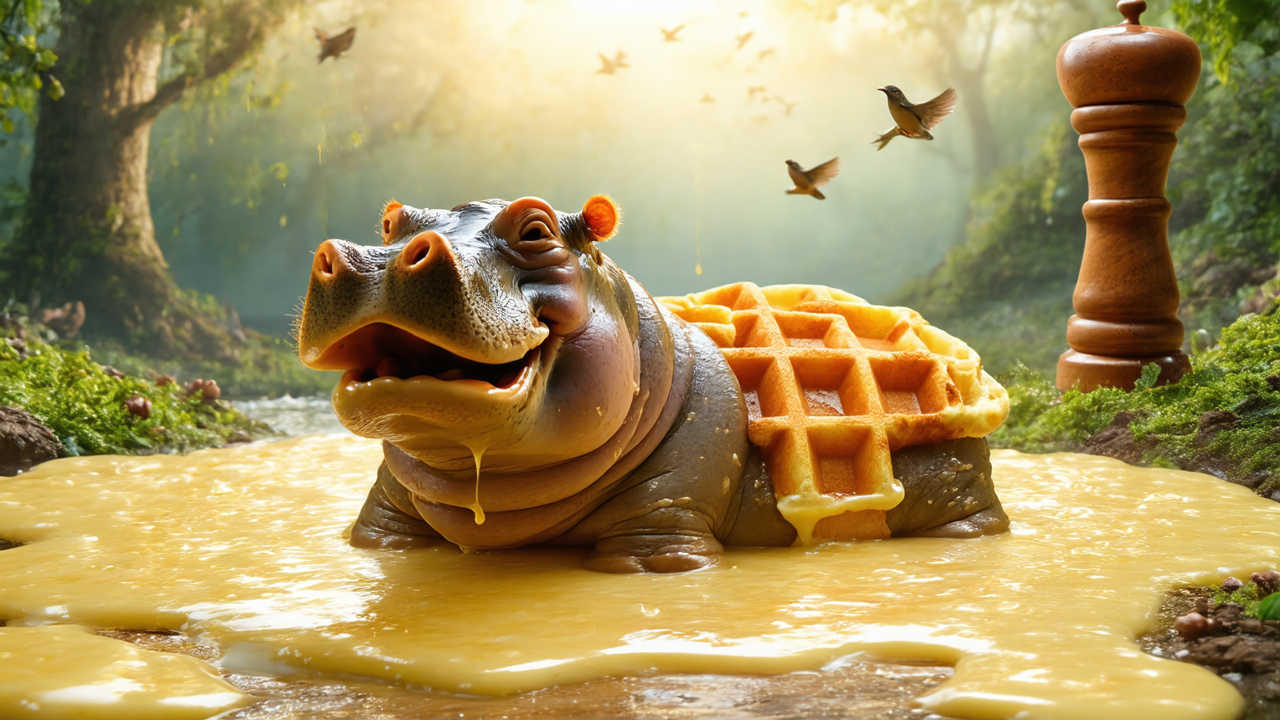

In [1]:
from diffusers import BitsAndBytesConfig, SD3Transformer2DModel
from diffusers import StableDiffusion3Pipeline
import torch

model_id = "stabilityai/stable-diffusion-3.5-large"

nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
print(nf4_config)
model_nf4 = SD3Transformer2DModel.from_pretrained(
    model_id,
    subfolder="transformer",
    quantization_config=nf4_config,
    torch_dtype=torch.bfloat16
)
print(model_nf4)

pipeline = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    transformer=model_nf4,
    torch_dtype=torch.bfloat16
)
pipeline.enable_model_cpu_offload()
#pipeline.enable_xformers_memory_efficient_attention()
print(pipeline,pipeline.device)

prompt = "A whimsical and creative image depicting a hybrid creature that is a mix of a waffle and a hippopotamus, basking in a river of melted butter amidst a breakfast-themed landscape. It features the distinctive, bulky body shape of a hippo. However, instead of the usual grey skin, the creature's body resembles a golden-brown, crispy waffle fresh off the griddle. The skin is textured with the familiar grid pattern of a waffle, each square filled with a glistening sheen of syrup. The environment combines the natural habitat of a hippo with elements of a breakfast table setting, a river of warm, melted butter, with oversized utensils or plates peeking out from the lush, pancake-like foliage in the background, a towering pepper mill standing in for a tree.  As the sun rises in this fantastical world, it casts a warm, buttery glow over the scene. The creature, content in its butter river, lets out a yawn. Nearby, a flock of birds take flight"

image = pipeline(
    prompt=prompt,
    num_inference_steps=28,
    guidance_scale=4.5,
    max_sequence_length=512,
    width=1280,
    height=720,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    generator=torch.Generator(device=pipeline.device).manual_seed(2),
).images[0]
print(type(image))
image.save("whimsical.png")
image
